In [1]:

# -*- coding: UTF-8 -*-
__author__ = 'zy'
__time__ = '2020/12/6 17:06'
file_list=['1.txt','2.txt','3.txt','4.txt','5.txt','6.txt']
result=""
for i in file_list:
    with open(i,'r',encoding='utf-8') as f:
        tmp=f.read()
        result=result+tmp
result=result.replace(' ',"").replace('\n',' ')
res=result.split('。')
print(len(res))
print(res)
res_list=[]
import jieba
for i in res:
    if i.strip()!="":
        res_list.append(' '.join(jieba.cut(i)))
    else:
        pass
print(res_list)

import jieba

from sklearn.feature_extraction.text import TfidfVectorizer
corpus = res_list
vector = TfidfVectorizer()
tfidf = vector.fit_transform(corpus)
# print (tfidf)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#这个迭代次数至少上千次

#多进行计算
lda = LatentDirichletAllocation(n_topics=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
docres = lda.fit_transform(tfidf)

print(len(lda.components_[1])) #4306个词语
print(docres)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

# % matplotlib
# inline


####
# Per topic: (token, pseudocount)
# pseudocount represents the number of times word j was assigned to topic i
#
# We can to convert these to a normalized form -- well you don't have to
# but it's easier to understand the output in this form.  Also, this is
# consistent with how Gensim performs.  After some consideration, we will plot these out.
####
import pandas as pd

def display_topics(model, feature_names, no_words=10, plot=False, plot_dim=(5, 2)):
    topics_tokens = []

    for topic_idx, topic in enumerate(model.components_):

        topic = zip(feature_names, topic)
        topic = sorted(topic, key=lambda pair: pair[1])

        topic_words = [(token, counts)
                       for token, counts in topic[:-no_words - 1:-1]]

        topics_tokens.append(topic_words)

        if not plot:
            print("Topic %d:" % (topic_idx))
            print(topic_words)

    if plot:

        plot_matrix = np.arange(10).reshape(5, 2)

        fig, ax = plt.subplots(figsize=(10, 10), nrows=5, ncols=2)

        topics = [
            {key: value for key, value in topic}
            for topic in topics_tokens
        ]

        row = 0

        for topic_id, topic in enumerate(topics):
            column = (0 if topic_id % 2 == 0 else 1)

            chart = pd.DataFrame([topic]).iloc[0].sort_values(axis=0)
            chart.plot(kind="barh", title="Topic %d" % topic_id, ax=ax[row, column])

            row += 1 if column == 1 else 0

        plt.tight_layout()


display_topics(lda , vector.get_feature_names(), no_words=10, plot=True)

plt.show()

1839
['2020年5-8月武汉水滞情况整理 2020年5月 5月8日 一、雨情 5月8日6时至11时，我市普降大到暴雨', '其中，汉口地区44.1-52.8毫米，汉阳地区36.5-41.4毫米，武昌地区33.8-49.7毫米，最大小时降雨量为41.3毫米', '  二、工情 7日接到市气象台《气象灾害预警信号》后，市水务部门提前预警，连夜值守，指挥调度，各区水务部门迅速响应，严格按照调度要求，立即组织应急值守队伍及抽排设备彻夜值守、巡查，第一时间投入应急抽排', '共出动巡查、值守人员1300余人次，各类抽排设备、车辆300余台次', '同时，各区、各单位密切关注排水管网、港渠水位变化，按照预案要求，及时开闸、开机，在沿江沿河自排的情况下，市属常青、新生路、前进路、杨泗港、四新等大型泵站加机抽排，累计抽排水量80万方', '  三、渍情 全市59处主次干道易渍水点总体情况良好', '此次降雨，水务、交管通力合作，共同发现了27处地段发生了轻度短时积水，经全力抢排，大多数积水5-10分钟消退，最迟早上8时30分全部消退', '其中江汉区华安里涵洞、硚口区建一路、武昌区水果湖高中部附近、洪山区友谊大道钢材市场、高新区佛祖岭一路涵洞5处老渍水点轻度短时积水，深度5-10公分，雨停水退，对交通未造成明显影响', '江岸区中一路涵洞、江汉区民意街天一社区，硚口路月湖桥两边、京汉大道双厂巷，汉阳大道快活岭、朱家亭，武昌区湖北大学周边地区，洪山区南湖供销学校、南湖路加气站、街道口地铁施工区域、南国大家装、滨湖路、三环线立交桥，经开区太子湖北路与海棠路交汇处、车城西路（六六虾庄）15处道路轻微积水，深度5-10公分，对城市功能未造成影响', '渍水相对较重的有武昌区东湖路、沙湖路秦园东路口、松竹路3处，其中东湖路由于施工建设影响，渍水时间50分钟，深度20公分，相关原因及整改措施正在排查整改中', '  新城区有4处渍水，为黄陂区的腾龙大道岱黄高速桥下涵洞、武湖大道汉英桥下、龙港大道往机场高速方向涵洞、汉口北大道滠口涵洞', ' 5月13日 5月13日早气象部门预报，预计5月13日夜间至14日白天我市将有一次中到大雨、局部暴雨天气过程', ' 市防办积极响应，对降雨应对工作进行了布置安排，上午即发出了预警，要求各单位、各区重点抓好三个环节：一是提前做好泵站、涵闸调度和人员值

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hp\AppData\Local\Temp\jieba.cache
Loading model cost 2.109 seconds.
Prefix dict has been built successfully.
G:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


<Figure size 1000x1000 with 10 Axes>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

# % matplotlib
# inline



In [3]:
plt.show()

In [4]:
docres

array([[0.02556236, 0.02556141, 0.0255614 , ..., 0.76989945, 0.02556367,
        0.02557899],
       [0.02263159, 0.02262945, 0.02262945, ..., 0.02262946, 0.02262955,
        0.79633157],
       [0.01576151, 0.01576062, 0.01576021, ..., 0.01576161, 0.01576129,
        0.01576055],
       ...,
       [0.01781149, 0.0178064 , 0.01780637, ..., 0.01781141, 0.8397219 ,
        0.01781081],
       [0.0342403 , 0.03424073, 0.03424031, ..., 0.03424159, 0.5689543 ,
        0.03424658],
       [0.01873573, 0.01873579, 0.01873568, ..., 0.83137617, 0.01873704,
        0.01873625]])

In [5]:
lda.components_.shape

(10, 2180)

In [7]:
import pandas as pd
corpus_df = pd.DataFrame({'Document0': lda.components_[0],
                          'Document1': lda.components_[1],
                          'Document2': lda.components_[2],
                          'Document3': lda.components_[3],
                          'Document4': lda.components_[4],
                          'Document5': lda.components_[5],
                          'Document6': lda.components_[6],
                          'Document7': lda.components_[7],
                          'Document8': lda.components_[8],
                          'Document9': lda.components_[9],})

In [8]:
corpus_df.head()

,Document0,Document1,Document2,Document3,Document4,Document5,Document6,Document7,Document8,Document9
0,1.301336,0.130611,0.128009,0.126107,0.129678,0.126191,0.126341,0.129114,0.493491,0.124189
1,3.511769,0.126917,0.130301,0.136024,0.125373,0.131222,0.126350,0.129785,0.125037,0.381383
2,3.608562,0.128042,0.129161,0.124680,0.120602,0.129459,0.128764,0.121544,0.127971,0.376686
3,2.543264,0.123319,0.128400,0.129283,0.127750,0.131918,0.127962,0.130030,0.131538,0.393540
4,3.762996,0.126248,0.127773,0.127517,0.130562,0.126549,0.126908,0.134415,0.125783,2.172994


In [11]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(lda.components_[0],lda.components_[1])
similarity_matrix_df = pd.DataFrame(similarity_matrix)
print(similarity_matrix_df.shape)


ValueError: Expected 2D array, got 1D array instead:
array=[1.30133598 3.51176916 3.60856195 ... 0.1262773  0.1300079  0.13051751].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
sim=cosine_similarity(lda.components_)
sim.shape



(10, 10)

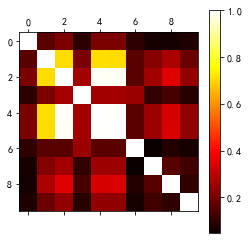

In [15]:
plt.matshow(sim, cmap='hot')
plt.colorbar()
plt.show()

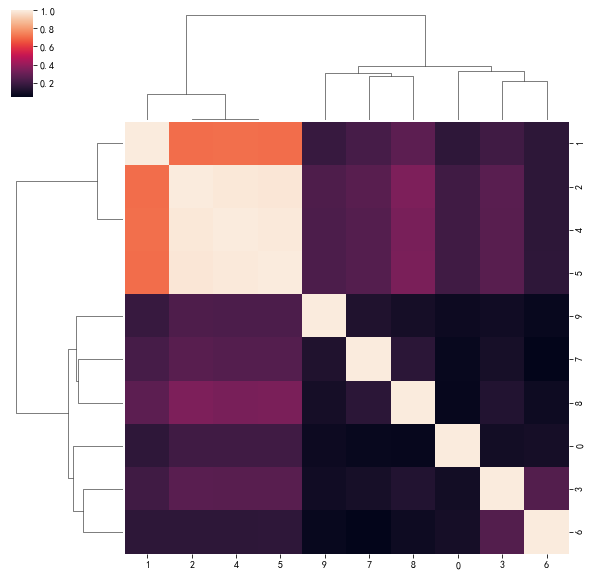

In [16]:
import seaborn as sns  #用于话热图的工具包
#层次聚类的热图和聚类图
sns.clustermap(sim,method ='ward',metric='euclidean')

plt.show()


In [21]:
pd.DataFrame(sim).to_csv('10X10相关性sim.csv',encoding="utf_8_sig",index=None)

In [18]:
corpus_df.to_csv('带词语的语料.csv',encoding="utf_8_sig",index=None)

In [20]:
pd.DataFrame(docres).to_csv('语料label.csv',encoding="utf_8_sig",index=None)



In [24]:
pd.DataFrame(np.array(res_list)).to_csv('res_list.csv',encoding="utf_8_sig",index=None)
